<center><img src="images/clothing.jpg"></center>

Welcome to the world of e-commerce, where customer feedback is a goldmine of insights! In this project, you'll dive into the Women's Clothing E-Commerce Reviews dataset, focusing on the 'Review Text' column filled with direct customer opinions.

Your mission is to use text embeddings and Python to analyze these reviews, uncover underlying themes, and understand customer sentiments. This analysis will help improve customer service and product offerings.

## The Data

You will be working with a dataset specifically focusing on customer reviews. Below is the data dictionary for the relevant field:

## womens_clothing_e-commerce_reviews.csv

| Column        | Description                           |
|---------------|---------------------------------------|
| `'Review Text'` | Textual feedback provided by customers about their shopping experience and product quality. |

Armed with access to powerful embedding API services, you will process the reviews, extract meaningful insights, and present your findings.

Let's get started!

## Before you start

In order to complete the project you will need to create a developer account with OpenAI and store your API key as a secure environment variable. Instructions for these steps are outlined below.

### Create a developer account with OpenAI

1. Go to the [API signup page](https://platform.openai.com/signup). 

2. Create your account (you'll need to provide your email address and your phone number).

3. Go to the [API keys page](https://platform.openai.com/account/api-keys). 

4. Create a new secret key.

<img src="images/openai-new-secret-key.png" width="200">

5. **Take a copy of it**. (If you lose it, delete the key and create a new one.)

### Add a payment method

OpenAI sometimes provides free credits for the API, but this can vary depending on geography. You may need to add debit/credit card details. 

**This project should cost much less than 1 US cents with `gpt-4o-mini` (but if you rerun tasks, you will be charged every time).**

1. Go to the [Payment Methods page](https://platform.openai.com/account/billing/payment-methods).

2. Click Add payment method.

<img src="images/openai-add-payment-method.png" width="200">

3. Fill in your card details.

### Add an environmental variable with your OpenAI key

1. In the workbook, click on "Environment," in the top toolbar and select "Environment variables".

2. Click "Add" to add environment variables.

3. In the "Name" field, type "OPENAI_API_KEY". In the "Value" field, paste in your secret key.

<img src="images/datalab-env-var-details.png" width="500">

4. Click "Create", then you'll see the following pop-up window. Click "Connect," then wait 5-10 seconds for the kernel to restart, or restart it manually in the Run menu.

<img src="images/connect-integ.png" width="500">

## Load OpenAI API key from environment variables
These variables can be referenced globally throughout the project while keeping their values secret. Good for setting passwords in credentials.

In [49]:
# Initialize your API key
import os
openai_api_key = os.environ["OPENAI_API_KEY"]

## Install useful libraries

In [50]:
# Update OpenAI to 1.3
from importlib.metadata import version
try:
    assert version('openai') == '1.3.0'
except:
    !pip install openai==1.3.0
import openai

In [51]:
# Run this cell to install ChromaDB if desired
try:
    assert version('chromadb') == '0.4.17'
except:
    !pip install chromadb==0.4.17
try:
    assert version('pysqlite3') == '0.5.2'
except:
    !pip install pysqlite3-binary==0.5.2
__import__('pysqlite3')
import sys
sys.modules['sqlite3'] = sys.modules.pop('pysqlite3')
import chromadb

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


## Load the dataset
Load data and perform basic data checks to ensure you are using relevant data for the analysis

In [52]:
# Load the dataset
import pandas as pd
reviews = pd.read_csv("womens_clothing_e-commerce_reviews.csv")

# Display the first few entries
reviews.head()

,Review ID,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [53]:
pip show openai

Name: openai
Version: 1.3.0
Summary: The official Python library for the openai API
Home-page: https://github.com/openai/openai-python
Author: 
Author-email: OpenAI <support@openai.com>
License: 
Location: /home/repl/.local/lib/python3.10/site-packages
Requires: anyio, distro, httpx, pydantic, tqdm, typing-extensions
Required-by: crewai, embedchain, instructor, langchain-openai, pyautogen
Note: you may need to restart the kernel to use updated packages.


In [54]:
from openai import OpenAI

client = OpenAI(api_key=openai_api_key)

def create_embeddings(texts):
    if isinstance(texts, str):
        texts = [texts]
    
    response = client.embeddings.create(
        model="text-embedding-3-small",
        input=texts
    )
    
    return [item.embedding for item in response.data]


In [55]:
reviews = reviews[reviews['Review Text'].notnull()]

In [56]:
embeddings=create_embeddings(reviews['Review Text'].to_list())

In [57]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [58]:
tsne = TSNE(n_components=2, perplexity=5)
embeddings_2d = tsne.fit_transform(np.array(embeddings))

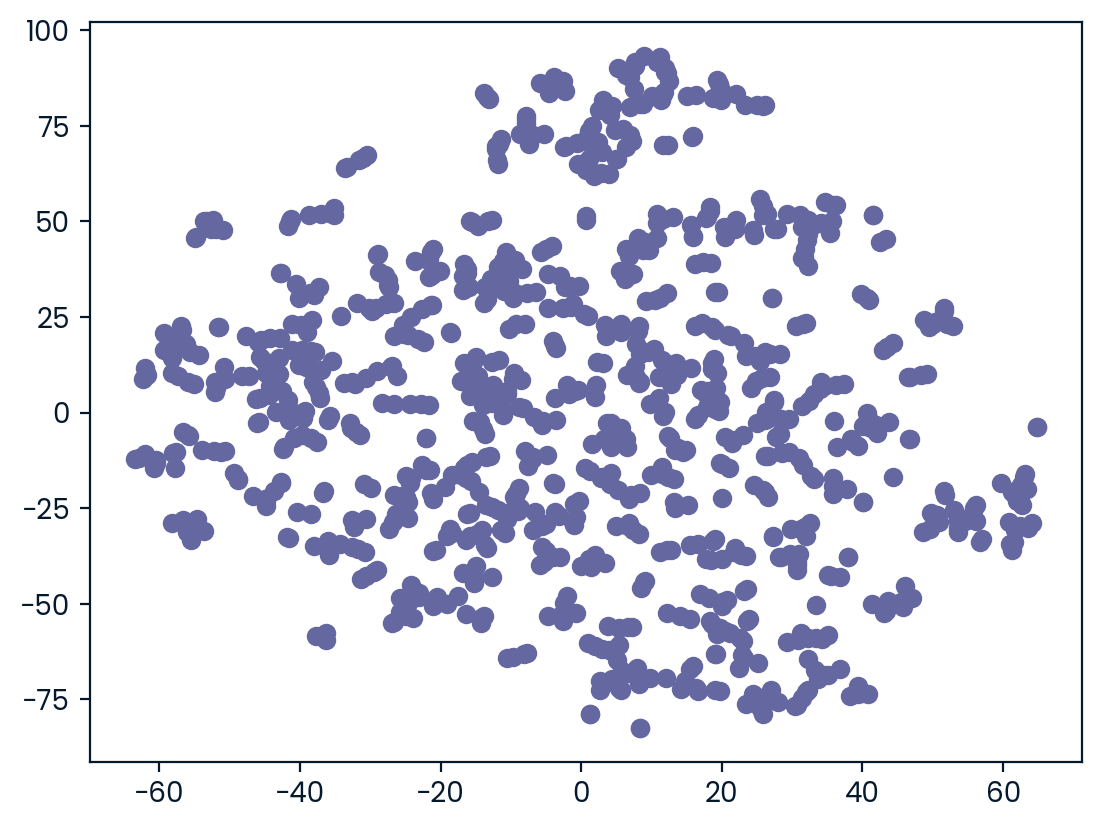

In [59]:
# Create a scatter plot from embeddings_2d
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1])
plt.show()

In [60]:
from sklearn.metrics.pairwise import cosine_similarity

# Define keywords for topics
keywords = ['quality', 'fit', 'style', 'comfort']

# Create embeddings for the keywords
keyword_embeddings = create_embeddings(keywords)

# Calculate cosine similarity between review embeddings and keyword embeddings
similarities = cosine_similarity(embeddings, keyword_embeddings)

# Find the top reviews for each keyword
top_reviews = {}
for i, keyword in enumerate(keywords):
    top_indices = np.argsort(similarities[:, i])[::-1][:5]  # Get top 5 reviews for each keyword
    top_reviews[keyword] = reviews.iloc[top_indices]

# Display the top reviews for each keyword
for keyword, top_df in top_reviews.items():
    print(f"Top reviews for '{keyword}':")
    display(top_df[['Review ID', 'Review Text']])
    print("\n")

Top reviews for 'quality':


,Review ID,Review Text
468,468,This top is soo pretty with a cool edge.\nit l...
552,552,"The jacket is great, the quality is very good ..."
616,616,Perfect fit. did not lose its shape. thicker m...
442,442,"Nice tee, true red,3/4 sleeves, lacing is a ni..."
933,933,"Sits at waist, length is perfect for petite, q..."




Top reviews for 'fit':


,Review ID,Review Text
467,467,"Nice fit and flare style, not clingy at all. i..."
618,618,The fit on these pants is just right for me. i...
616,616,Perfect fit. did not lose its shape. thicker m...
528,528,Slouchy relaxed fit. well sewn together and ha...
421,421,Great feature...perfect lacing...do not need t...




Top reviews for 'style':


,Review ID,Review Text
859,859,Great style!
726,726,This is a cool relaxed style with the benefit ...
682,682,This is a fabulous style top! highly recommend...
143,143,Ii'm not usually big on lace but this is so un...
468,468,This top is soo pretty with a cool edge.\nit l...




Top reviews for 'comfort':


,Review ID,Review Text
0,0,Absolutely wonderful - silky and sexy and comf...
502,502,Very comfortable and versatile. got lots of co...
198,198,"For a now feel, that comfy and well made, this..."
497,497,"Very cute, very comfortable. for me aesthetics..."
407,407,"Soft, comfortable, stylish. i eagerly awaited ..."


In [61]:
def find_similar_reviews(input_review, reviews, embeddings, top_n=3):
    # Create embedding for the input review
    input_embedding = create_embeddings([input_review])[0]
    
    # Calculate cosine similarity between the input review and all other reviews
    similarities = cosine_similarity([input_embedding], embeddings)[0]
    
    # Get the indices of the top_n most similar reviews
    top_indices = np.argsort(similarities)[::-1][:top_n]
    
    # Retrieve the top_n most similar reviews
    similar_reviews = reviews.iloc[top_indices]
    
    return similar_reviews[['Review ID', 'Review Text']]

# Input review
input_review = "Absolutely wonderful - silky and sexy and comfortable"

# Find the most similar reviews
most_similar_reviews_df = find_similar_reviews(input_review, reviews, embeddings)

# Store the output as a list
most_similar_reviews = most_similar_reviews_df.to_dict('records')

In [62]:
most_similar_reviews=[review['Review Text'] for review in most_similar_reviews]

In [65]:
most_similar_reviews

['Absolutely wonderful - silky and sexy and comfortable',
 'Very comfortable and versatile. got lots of compliments.',
 'This is a very comfortable and sexy sleep dress, the way it drapes. i can see that the type of fabric is not suitable for out and about activities and can catch on snags, etc. very easily. once i relegated it to the nightgown category it became my favorite item to wear and lounge in.']